# Modelos Metapopulacionais

O conceito de metapopulações pode ser visto como uma maneira relativamente simples de tratar a heterogeneidade em populações sem abandonar o paradigma de populações homogêneas modeladas com Equações diferenciais ordinárias.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/94/Metapopulation_%281%29.svg/2560px-Metapopulation_%281%29.svg.png" width = "600" height="300">

#### Exercício 1:

Desenvolva um modelo metapopulacional com dois patches (duas sub-populações) A e B nos quais se propaga uma doença de transmissão direta modelada como SIR. Considere que existe um fluxo migratório entre as cidades.

1. Escreva as equações das duas populações representando as migrações $A \rightarrow B$ como  $k_1$, e $B \rightarrow A$ como $k_2$.
1. Utilizando uma parametrização que não permita equilíbrio endêmico, encontre os equilíbrios $S_A^* + S_B^*$ e $I_A^* + I_B^*$ .
1. Calcule a Matriz Jacobiana do sistema e determine  a estabilidade dos equilíbrios.
1. Crie uma função interativa que nos permita alterar os valores de $k_1$ e $k_2$. Realize simulações com $k_1 = k_2$, $k_1 < k_2$ e $k_1 > k_2$, com $\beta_A \neq \beta_B$



In [1]:
%display typeset

#### Resposta ao item 1:

$$ \dot{S}_A = -\beta_A S_A I_A + k_2 S_B - k_1 S_A$$
$$\dot{I}_A = \beta_A S_A I_A + k_2 I_B - k_1 I_A -\gamma I_A$$
$$\dot{S}_B = -\beta_B S_B I_B + k_1 S_A - k_2 S_B $$
$$\dot{I}_B = \beta_B S_B I_B + k_1 I_A - k_2 I_B -\gamma I_B$$

2) Vamos agora encontrar os equilíbrios do sistema usando o solver do sage:

In [2]:
var('S_A I_A S_B I_B beta_A beta_B R_A R_B gamma k_1 k_2')
#beta_A = 1.2
#beta_B = 1.2
#gamma = 0.5
#k_1 = 0.5
#k_2 = 0.5
solve([-beta_A*S_A*I_A + k_2*S_B - k_1*S_A, 
       beta_A*S_A*I_A+ k_2*I_B - k_1*I_A - gamma*I_A,
       -beta_B*S_B*I_B - k_2*S_B + k_1*S_A,
       beta_B*S_B*I_B- k_2*I_B + k_1*I_A - gamma*I_B,
       gamma*I_A,
       gamma*I_B],[S_A, I_A, S_B, I_B, R_A, R_B])

[[S_A == r1, I_A == 0, S_B == k_1*r1/k_2, I_B == 0, R_A == r2, R_B == r3]]

3) Calculamos a Matriz jacobiana para podermos realizar a análise de estabilidade do equilíbrio encontrado acima

In [3]:
J = jacobian([-beta_A*S_A*I_A + k_2*S_B - k_1*S_A, 
       beta_A*S_A*I_A+ k_2*I_B - k_1*I_A - gamma*I_A,
       -beta_B*S_B*I_B - k_2*S_B + k_1*S_A,
       beta_B*S_B*I_B- k_2*I_B + k_1*I_A - gamma*I_B],[S_A, I_A, S_B, I_B])
J

[       -I_A*beta_A - k_1              -S_A*beta_A                      k_2                        0]
[              I_A*beta_A S_A*beta_A - gamma - k_1                        0                      k_2]
[                     k_1                        0        -I_B*beta_B - k_2              -S_B*beta_B]
[                       0                      k_1               I_B*beta_B S_B*beta_B - gamma - k_2]

Agora Substituímos o valor do equilíbrio na matriz jacobiana:

In [4]:
J_eq = J(S_A=1,I_A=0,S_B=k_1/k_2,I_B=0)
J_eq

[                         -k_1                       -beta_A                           k_2                             0]
[                            0          beta_A - gamma - k_1                             0                           k_2]
[                          k_1                             0                          -k_2               -beta_B*k_1/k_2]
[                            0                           k_1                             0 -gamma + beta_B*k_1/k_2 - k_2]

e também os valores dos parâmetros

In [5]:
J_eq(gamma=1.0,k_1=.5,k_2=.5,beta_A=1.6,beta_B=1.6).eigenvalues()

[3/5, -2/5, -1, 0]

Como o maior autovalor é real e positivo o Equilíbrio é instável

4) Agora vamos criar uma simulação interativa para estudar o efeito da existência de patches na dinâmica do sistema.

In [6]:
def model_2_pop(t, y, params):
    beta_A, beta_B, gamma, k_1, k_2, mu = params
    S_A, I_A, S_B, I_B, R_A, R_B = y
    return [-beta_A*S_A*I_A + k_2*S_B - k_1*S_A, 
       beta_A*S_A*I_A+ k_2*I_B - k_1*I_A - gamma*I_A,
       -beta_B*S_B*I_B - k_2*S_B + k_1*S_A,
       beta_B*S_B*I_B - k_2*I_B + k_1*I_A - gamma*I_B,
       gamma*I_A,
       gamma*I_B]

Agora vamos criar uma versão do modelo anterior, com nascimentos e mortes, ou seja demografia:

$$ \dot{S}_A = -\beta_A S_A I_A + k_2 S_B - k_1 S_A -\mu S_A +\mu(S_A+I_A+R_A)$$
$$\dot{I}_A = \beta_A S_A I_A + k_2 I_B - k_1 I_A -\gamma I_A -\mu I_A$$
$$\dot{R}_A = \gamma I_A-\mu R_A$$
$$\dot{S}_B = -\beta_B S_B I_B + k_1 S_A - k_2 S_B -\mu S_B +\mu(S_B+I_B+R_B)$$
$$\dot{I}_B = \beta_B S_B I_B + k_1 I_A - k_2 I_B -\gamma I_B -\mu I_B$$
$$\dot{R}_B= \gamma I_B-\mu R_B$$

In [7]:
def model_2_pop_demog(t, y, params):
    beta_A, beta_B, gamma, k_1, k_2, mu = params
    S_A, I_A, S_B, I_B, R_A, R_B = y
    return [-beta_A*S_A*I_A + k_2*S_B - k_1*S_A -mu*S_A +mu*(S_A+I_A+R_A), 
       beta_A*S_A*I_A+ k_2*I_B - k_1*I_A - gamma*I_A - mu*I_A,
       -beta_B*S_B*I_B - k_2*S_B + k_1*S_A - mu*S_B+mu*(S_B+I_B+R_B),
       beta_B*S_B*I_B - k_2*I_B + k_1*I_A - gamma*I_B - mu*I_B,
       gamma*I_A-mu*R_A,
       gamma*I_B-mu*R_B]

Agora passamos à instanciação do nosso solver e à implementação de uma função de plotagem.

In [8]:
T=ode_solver()
T.function = model_2_pop
T.algorithm = "rk8pd"#"rk4imp"
from itertools import cycle
labels = [r"$S_A$", "$I_A$", "$S_B$", "$I_B$","$R_A$", "$R_B$"]

def plot_sol(sol):
    plots=None
    c = cycle(['red','blue','green', 'black', 'yellow', 'orange', 'magenta', 'gray', 'pink', 'brown'])
    for i,co in zip(range(len(sol[0][1])),c):
#         co = c.next()
        if plots is None:
            plots = list_plot([(j[0],j[1][i]) for j in sol],color=co, plotjoined=True,      legend_label='%s'%labels[i], alpha=.8, gridlines=true)
        else:
            plots += list_plot([(j[0],j[1][i]) for j in sol],color=co, plotjoined=True,           legend_label='%s'%labels[i], alpha=.8, gridlines=true)
    show(plots)

In [9]:
@interact()
def simula(beta_A=(4.6,(.2,5,.1)), beta_B=(3.6,(.2,5,.1)), gamma=(1.2, 2,.1), k_1=(0.5,(0,1,.1)), k_2=(0.5,(0,1,.1)), mu=(.04,(0, 1,.1)), model=selector(['no demog', 'demog'], buttons=True)):
    if model == "demog":
        T.function = model_2_pop_demog
    else:
        T.function = model_2_pop
    inits = (.9,0.1, 1, 0, 0, 0)
    t_span = [0,30]
    T.ode_solve(t_span,inits,num_points=300, params=(beta_A, beta_B, gamma, k_1, k_2, mu))
    show(inits[0]*k_1/k_2)
    plot_sol(T.solution)

Interactive function <function simula at 0x7fabd8f4e700> with 7 widgets
  beta_A: FloatSlider(value=4.6, description='beta_A', max=5.0, min=0.2)
  beta_B: FloatSlider(value=3.6, description='beta_B', max=5.0, min=0.2)
  gamma: FloatSlider(value=1.6, description='gamma', max=2.0, min=1.2)
  k_1: FloatSlider(value=0.5, description='k_1', max=1.0)
  k_2: FloatSlider(value=0.5, description='k_2', max=1.0)
  mu: FloatSlider(value=0.04, description='mu', max=1.0)
  model: ToggleButtons(description='model', options=('no demog', 'demog'), value='no demog')

#### Exercício 2:

Modelos evolutivos em 5 patches.  Adapte o modelo de seleção natural sem mutação, para 4 subpopulações, mantendo a generalidade para multiplos tipos.

1. Escreva as equações em forma matricial
2. Encontre os equilíbrios do sistema
3. Escreva uma função interativa para estudar os parâmetros



In [14]:
pretty_print(html('a) Vamos escrever o modelo evolutivo, começando com 4 tipos e 5 localidades, denotadas pelos vetores $X$ e $L$, respectivamente:'))
var('x_1 x_2 x_3 x_4 A B C D E')
X = Matrix(SR,[x_1, x_2, x_3, x_4])
L = Matrix(SR,[A,B,C,D,E])
show("X=", X,", L=",L)

D = Matrix(SR, X.ncols(),L.ncols(), lambda i,j: var('{}{}'.format(X[0,i],L[0,j])))
pretty_print(html("Seja $D$ a matriz com as densidades em cada uma das localidades:"))
show("D=",D)
pretty_print(html("Seja $M$ a matriz com as taxas de migração $k_{ij}$ entre cada uma das localidades. como não faz sentido fala de migração de uma localidade "))
pretty_print(html("para si mesma, sua diagonal é zero. "))
M = Matrix(SR, L.ncols(),L.ncols(), lambda i,j: var(f'k_{L[0,i]}{L[0,j]}'))
MD = Matrix(SR, L.ncols(),L.ncols(), lambda i,j: 0 + int(i==j)*sum(M[i]))  # Diagonal de M
MLT = Matrix(SR, L.ncols(),L.ncols(), lambda i,j: (1-int(j>=i))*var(f'k_{L[0,i]}{L[0,j]}')) # Triangulo inferior
MUT = Matrix(SR, L.ncols(),L.ncols(), lambda i,j: (1-int(j<=i))*var(f'k_{L[0,i]}{L[0,j]}')) # Triangulo superior
M = M-(identity_matrix(5).elementwise_product(M))#+MD  # MLT+MD+MUT
show("M=",M)
pretty_print(html(r"Logo, $F=D \times M$ é uma matriz em que cada elemento $f_{ij}$ representa a IMIGRAÇÃO do tipo $i$ em cada patch $j$ vindo de todos os outros patches:"))
Fi = D*M
show("Fi=", Fi)

pretty_print(html("Seja $f_i$ o vetor de fitness de cada tipo $i$:"))
f_i = Matrix(SR, [1/5, 1/3, 2/5, 1/2])
show('f=', f_i)
pretty_print(html(r"Nosso modelo fica então $\dot{x_{ij}}=f_i \times x_{ij} + F_{ij}- E_{ij} -\phi x_i$:"))


a) Vamos escrever o modelo evolutivo, começando com 4 tipos e 5 localidades, denotadas pelos vetores \(X\) e \(L\), respectivamente:

'X=' [x_1 x_2 x_3 x_4] ', L=' [A B C D E]

Seja \(D\) a matriz com as densidades em cada uma das localidades:

'D=' [x_1A x_1B x_1C x_1D x_1E]
[x_2A x_2B x_2C x_2D x_2E]
[x_3A x_3B x_3C x_3D x_3E]
[x_4A x_4B x_4C x_4D x_4E]

Seja \(M\) a matriz com as taxas de migração \(k_{ij}\) entre cada uma das localidades. como não faz sentido fala de migração de uma localidade

para si mesma, sua diagonal é zero.

'M=' [   0 k_AB k_AC k_AD k_AE]
[k_BA    0 k_BC k_BD k_BE]
[k_CA k_CB    0 k_CD k_CE]
[k_DA k_DB k_DC    0 k_DE]
[k_EA k_EB k_EC k_ED    0]

Logo, \(F=D \times M\) é uma matriz em que cada elemento \(f_{ij}\) representa a IMIGRAÇÃO do tipo \(i\) em cada patch \(j\) vindo de todos os outros patches:

'Fi=' [k_BA*x_1B + k_CA*x_1C + k_DA*x_1D + k_EA*x_1E k_AB*x_1A + k_CB*x_1C + k_DB*x_1D + k_EB*x_1E k_AC*x_1A + k_BC*x_1B + k_DC*x_1D + k_EC*x_1E k_AD*x_1A + k_BD*x_1B + k_CD*x_1C + k_ED*x_1E k_AE*x_1A + k_BE*x_1B + k_CE*x_1C + k_DE*x_1D]
[k_BA*x_2B + k_CA*x_2C + k_DA*x_2D + k_EA*x_2E k_AB*x_2A + k_CB*x_2C + k_DB*x_2D + k_EB*x_2E k_AC*x_2A + k_BC*x_2B + k_DC*x_2D + k_EC*x_2E k_AD*x_2A + k_BD*x_2B + k_CD*x_2C + k_ED*x_2E k_AE*x_2A + k_BE*x_2B + k_CE*x_2C + k_DE*x_2D]
[k_BA*x_3B + k_CA*x_3C + k_DA*x_3D + k_EA*x_3E k_AB*x_3A + k_CB*x_3C + k_DB*x_3D + k_EB*x_3E k_AC*x_3A + k_BC*x_3B + k_DC*x_3D + k_EC*x_3E k_AD*x_3A + k_BD*x_3B + k_CD*x_3C + k_ED*x_3E k_AE*x_3A + k_BE*x_3B + k_CE*x_3C + k_DE*x_3D]
[k_BA*x_4B + k_CA*x_4C + k_DA*x_4D + k_EA*x_4E k_AB*x_4A + k_CB*x_4C + k_DB*x_4D + k_EB*x_4E k_AC*x_4A + k_BC*x_4B + k_DC*x_4D + k_EC*x_4E k_AD*x_4A + k_BD*x_4B + k_CD*x_4C + k_ED*x_4E k_AE*x_4A + k_BE*x_4B + k_CE*x_4C + k_DE*x_4D]

Seja \(f_i\) o vetor de fitness de cada tipo \(i\):

'f=' [1/5 1/3 2/5 1/2]

Nosso modelo fica então \(\dot{x_{ij}}=f_i \times x_{ij} + F_{ij}- E_{ij} -\phi x_i\):

Onde a emigração $E_{ij}$de cada tipo $i$ a partir de cada local $j$ é dada pelo efluxo total de cada localidade:



In [15]:
# Vamos somar as linhas de M para gerar os efluxo de cada localidade
of=matrix(sum(M.columns()))
of

[k_AB + k_AC + k_AD + k_AE k_BA + k_BC + k_BD + k_BE k_CA + k_CB + k_CD + k_CE k_DA + k_DB + k_DC + k_DE k_EA + k_EB + k_EC + k_ED]

Multiplicado pelas densidades relativas de cada tipo em cada localidade

In [16]:
for i in range(2):
    of=of.stack(of)
E = of.elementwise_product(D)
show("Ei=",E)

'Ei=' [(k_AB + k_AC + k_AD + k_AE)*x_1A (k_BA + k_BC + k_BD + k_BE)*x_1B (k_CA + k_CB + k_CD + k_CE)*x_1C (k_DA + k_DB + k_DC + k_DE)*x_1D (k_EA + k_EB + k_EC + k_ED)*x_1E]
[(k_AB + k_AC + k_AD + k_AE)*x_2A (k_BA + k_BC + k_BD + k_BE)*x_2B (k_CA + k_CB + k_CD + k_CE)*x_2C (k_DA + k_DB + k_DC + k_DE)*x_2D (k_EA + k_EB + k_EC + k_ED)*x_2E]
[(k_AB + k_AC + k_AD + k_AE)*x_3A (k_BA + k_BC + k_BD + k_BE)*x_3B (k_CA + k_CB + k_CD + k_CE)*x_3C (k_DA + k_DB + k_DC + k_DE)*x_3D (k_EA + k_EB + k_EC + k_ED)*x_3E]
[(k_AB + k_AC + k_AD + k_AE)*x_4A (k_BA + k_BC + k_BD + k_BE)*x_4B (k_CA + k_CB + k_CD + k_CE)*x_4C (k_DA + k_DB + k_DC + k_DE)*x_4D (k_EA + k_EB + k_EC + k_ED)*x_4E]

In [17]:
def sel_model(t, D, params):
    D = np.array(D).reshape((4,5))
#     print(D)
    f, M= np.array(params[0]).reshape(4,1),np.array(params[1])
    F=D@M
    of = (M.sum(axis=1)).reshape(1,5)
    E = np.vstack([of,of,of,of])*D

    phi = sum(f*D, axis=0)
    res = f*D + F - E - phi*D 
    return list(res.ravel())

In [18]:
T2=ode_solver()
T2.function = sel_model
T2.algorithm = "rk8pd"

In [19]:
import numpy as np
import matplotlib.pyplot as plt
inits = np.random.random((4,5))
# Normalizing population on every locality
s = inits.sum(axis=0)
inits /= s.reshape(1,5)
print(inits.sum(axis=0))
inits = inits.ravel()
t_span = [0,70]
m = np.random.random((5,5)) # random migration rates
np.fill_diagonal(m,0)
m = np.around(m,2)
f = np.array(f_i)
T2.ode_solve(t_span,list(inits),num_points=300, params=(f,m))

[1. 1. 1. 1. 1.]


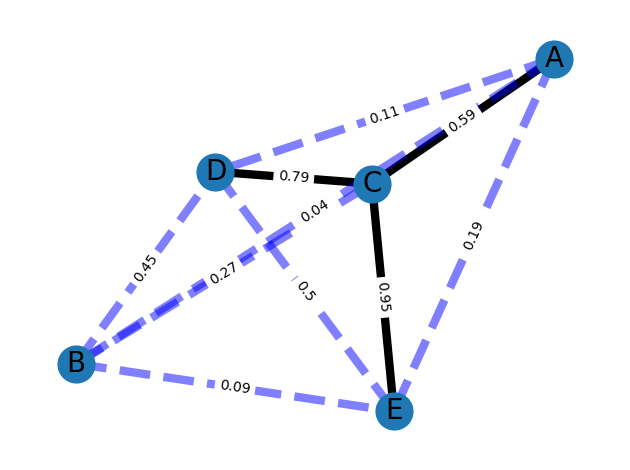

In [20]:
import networkx as nx
def plot_network(mr):
    G = nx.from_numpy_array(mr, parallel_edges=True)
    G = nx.relabel_nodes(G, {0:'A',1:'B',2:'C',3:'D',4:'E'})

    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=700)
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
    nx.draw_networkx_edges(
            G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
        )

    # node labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
    # edge weight labels
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels)

    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
plot_network(m)

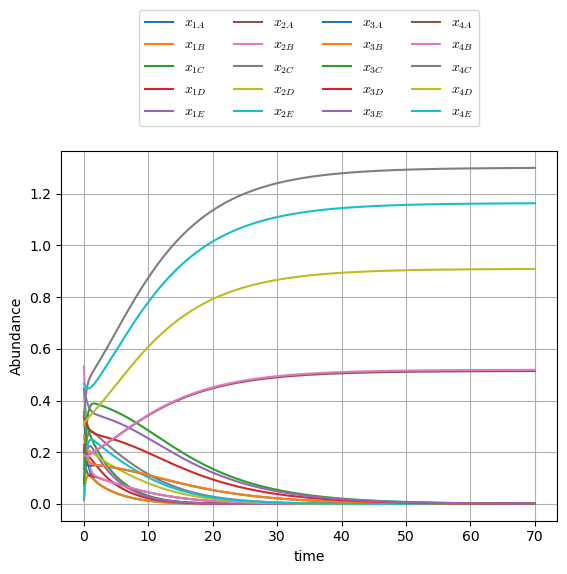

In [21]:
def plot_matrix_pop(sol):
    series = []
    ts = []
    for t, s in sol:
        ts.append(t)
        series.append(s)
    plt.plot(ts, np.array(series))
    plt.grid()
    plt.xlabel('time')
    plt.ylabel('Abundance')
    plt.legend(['$x_{1A}$','$x_{1B}$','$x_{1C}$','$x_{1D}$','$x_{1E}$',
                '$x_{2A}$','$x_{2B}$','$x_{2C}$','$x_{2D}$','$x_{2E}$',
                '$x_{3A}$','$x_{3B}$','$x_{3C}$','$x_{3D}$','$x_{3E}$',
                '$x_{4A}$','$x_{4B}$','$x_{4C}$','$x_{4D}$','$x_{4E}$'
               ], fancybox=True, loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=4,)

plot_matrix_pop(T2.solution)

In [22]:
inits = sel_model(0,inits,[f_i,m])
# inits

### Epigrass: Modelos metapopulacionais geo-referenciados
Para criar e simular modelos metapopulacionais mais complexos a biblioteca [Epigrass](https://github.com/fccoelho/epigrass) pode ajudar.

<iframe width="560" height="315" src="https://www.youtube.com/embed/videoseries?list=PLaBTcLw49xPjc0bnkpvNEG-_etYpWv7aC" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
